# Image Classification with a CNN #
### (Cat or Dog recognition) ###



#### 1. Importing Libraries ####
First of all, we should import all needed libraries.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#### 2. Importing Dataset ####
Then we should import all needed datatset for training our model.
<br>
Our input dataset is pictures in digits and in  a 2000 by 30000 matrix which shows 2000 pics in 100x100x3for each images.
<br>
After reading it into Pandas, we should convert it to Numpy due to learning process.
<br>
Then we see all data about dimentions of our dataset after reshaping them for learning process.

In [2]:
X_train = pd.read_csv("input.csv")
Y_train = pd.read_csv("labels.csv")

X_test = pd.read_csv("input_test.csv")
Y_test = pd.read_csv("labels_test.csv")

In [3]:
X_train = X_train.to_numpy()

In [4]:
Y_train = Y_train.to_numpy()

In [5]:
X_test = X_test.to_numpy()

In [6]:
Y_test = Y_test.to_numpy()

In [10]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1999, 100, 100, 3)
Shape of Y_train:  (1999, 1)
Shape of X_test:  (399, 100, 100, 3)
Shape of Y_test:  (399, 1)


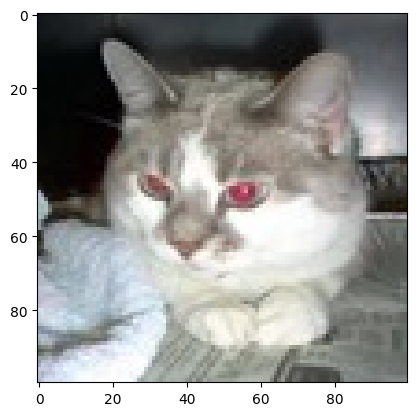

In [12]:
x = random.randint(0, len(X_train))
plt.imshow(X_train[x, :])
plt.show()

#### 3. Model ####
Now We Build, compile, and fit the Model.


In [13]:
model = Sequential([
    
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
                  ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs = 3, batch_size = 64)

Epoch 1/3
32/32 [==============================] - 36s 1s/step - loss: 0.7367 - accuracy: 0.5093
Epoch 2/3
32/32 [==============================] - 33s 1s/step - loss: 0.6715 - accuracy: 0.5868
Epoch 3/3
32/32 [==============================] - 34s 1s/step - loss: 0.6202 - accuracy: 0.6543


In [17]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 165ms/step - loss: 0.6230 - accuracy: 0.6441


[0.623043417930603, 0.6441102623939514]

#### 4. Making predictions ####
 Now we can randomly select a picture and predict it with our model to see its correctness.

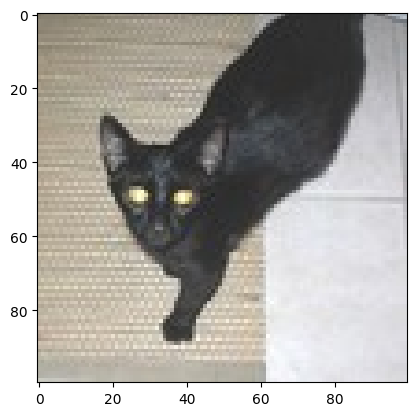

1/1 [==============================] - 0s 43ms/step
Our model's prediction: DOG


In [32]:
x = random.randint(0, len(Y_test))
plt.imshow(X_test[x, :])
plt.show()

y_pred = model.predict(X_test[x, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'DOG'
else:
    pred = 'CAT'
    
print("Our model's prediction:", pred)